In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno as msno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets 

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config

import warnings
warnings.filterwarnings('ignore')

/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/nhanes/load.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/pkg_resources/__init__.py:3144: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


In [7]:
%run pandas-missing-extension.ipynb

In [2]:
airquality_df = (sm.datasets.get_rdataset('airquality')
                  .data.clean_names(case_type = 'snake')
                  .add_column('year',1973)
                  .assign(date = lambda df: pd.to_datetime(df[['year','month','day']]))
                  .sort_values(by = 'date')
                  .set_index('date'))
airquality_df

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


# Ozone

## Imputación por llenado hacia atras

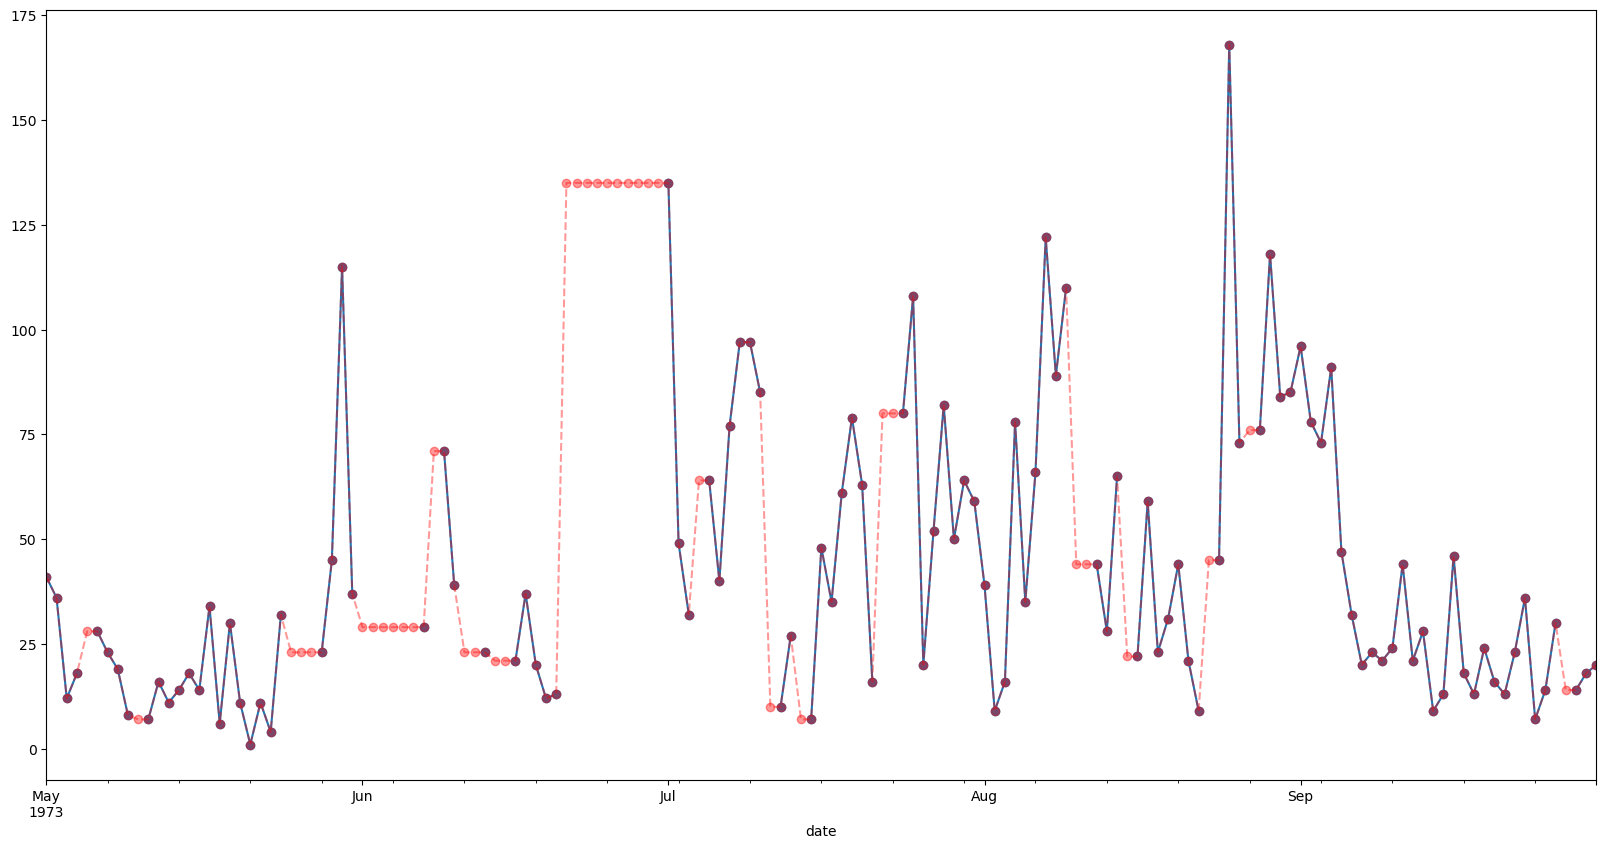

In [9]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.bfill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

## Imputación por llenado hacia adelante

- Llenado de Acciones (Los fines de semana no hay valores) / Series económicas

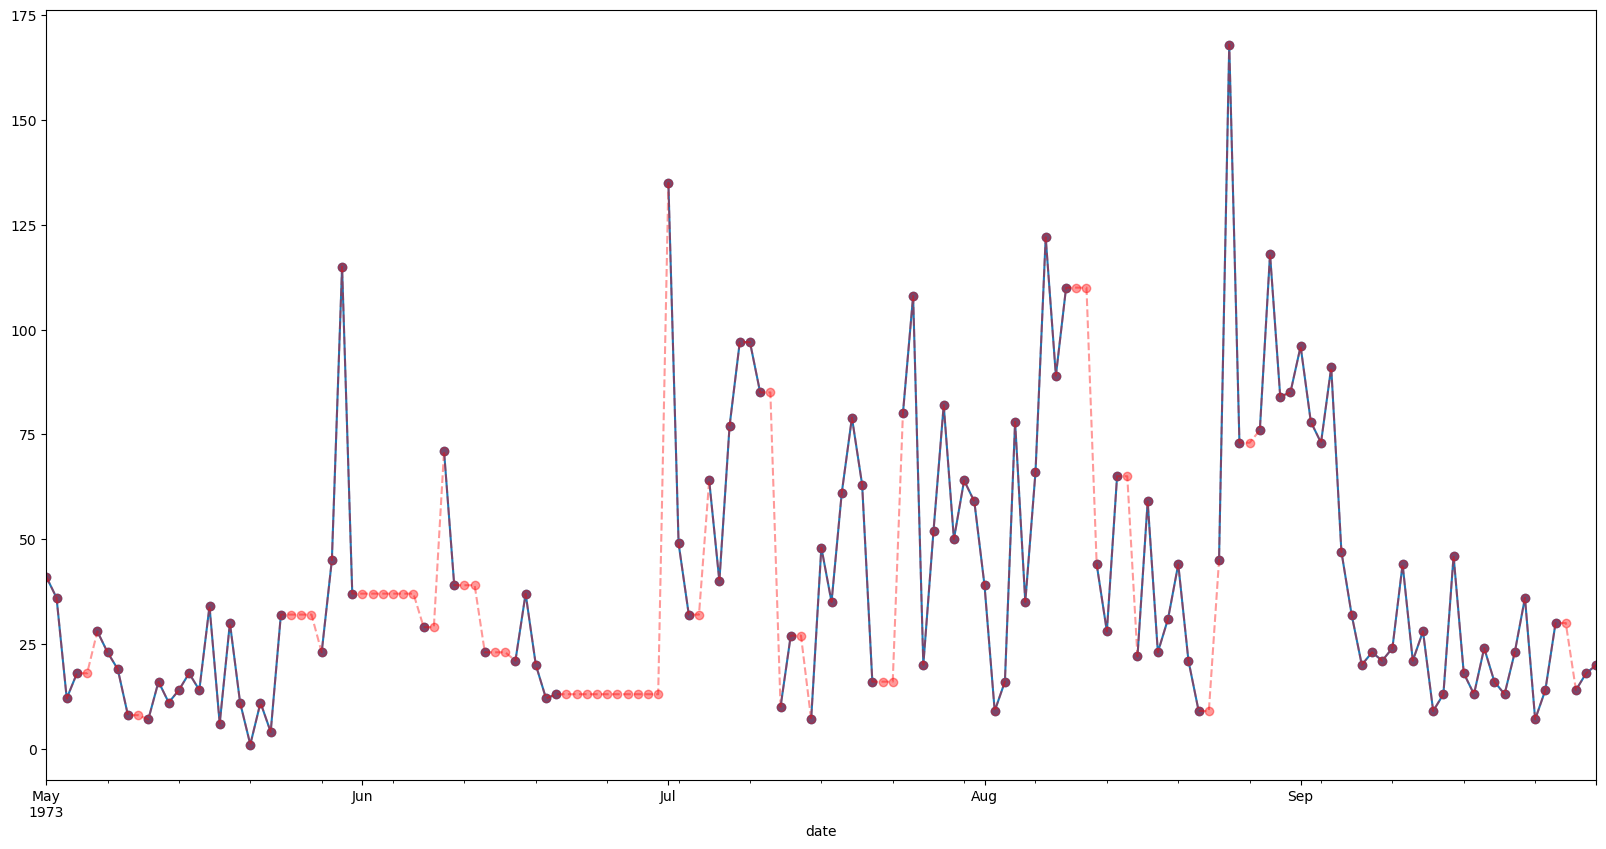

In [10]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.ffill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

## Imputación por interpolación

### Nearest

- Se pega al dato no nulo más cercano

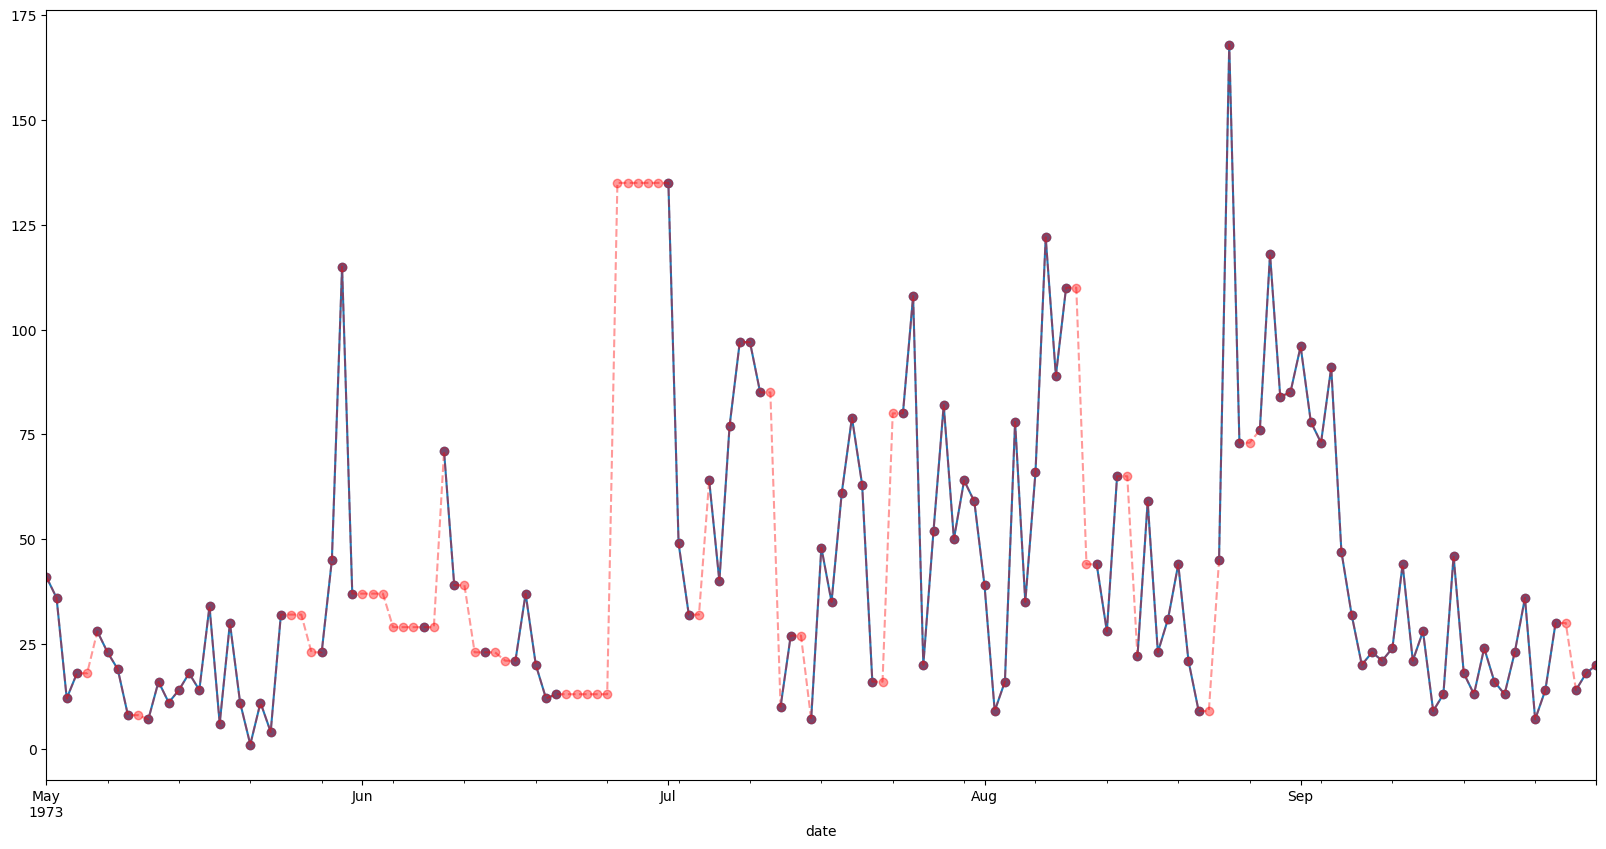

In [12]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'nearest').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

### Linear

- Se pega al dato a través de una línea recta

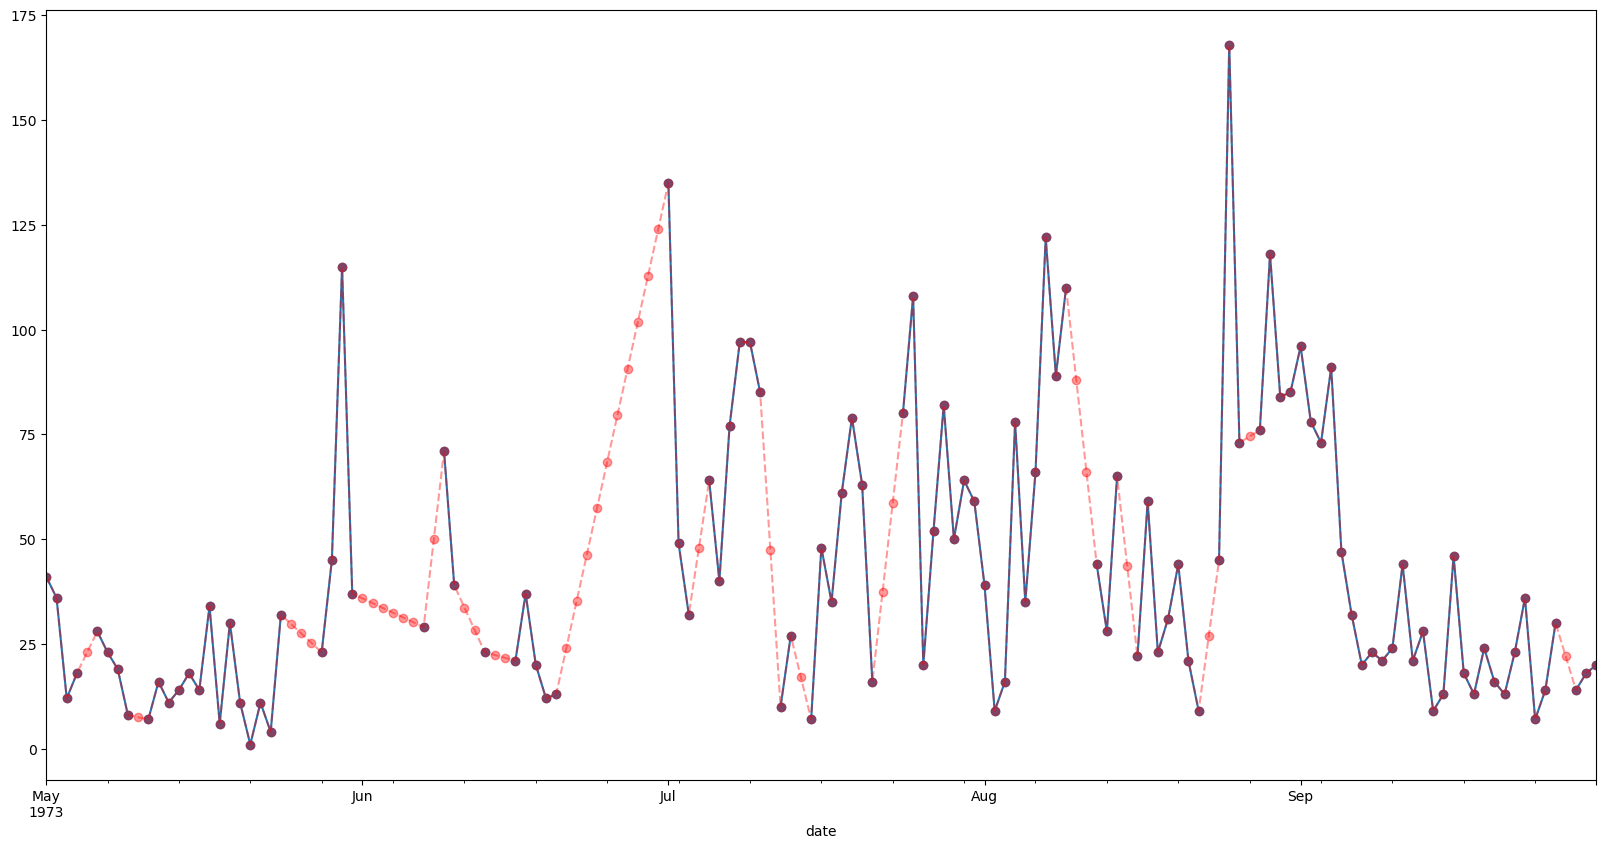

In [13]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'linear').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

### Quadratic

- Se pega al dato a través de una ecuación cuadrática

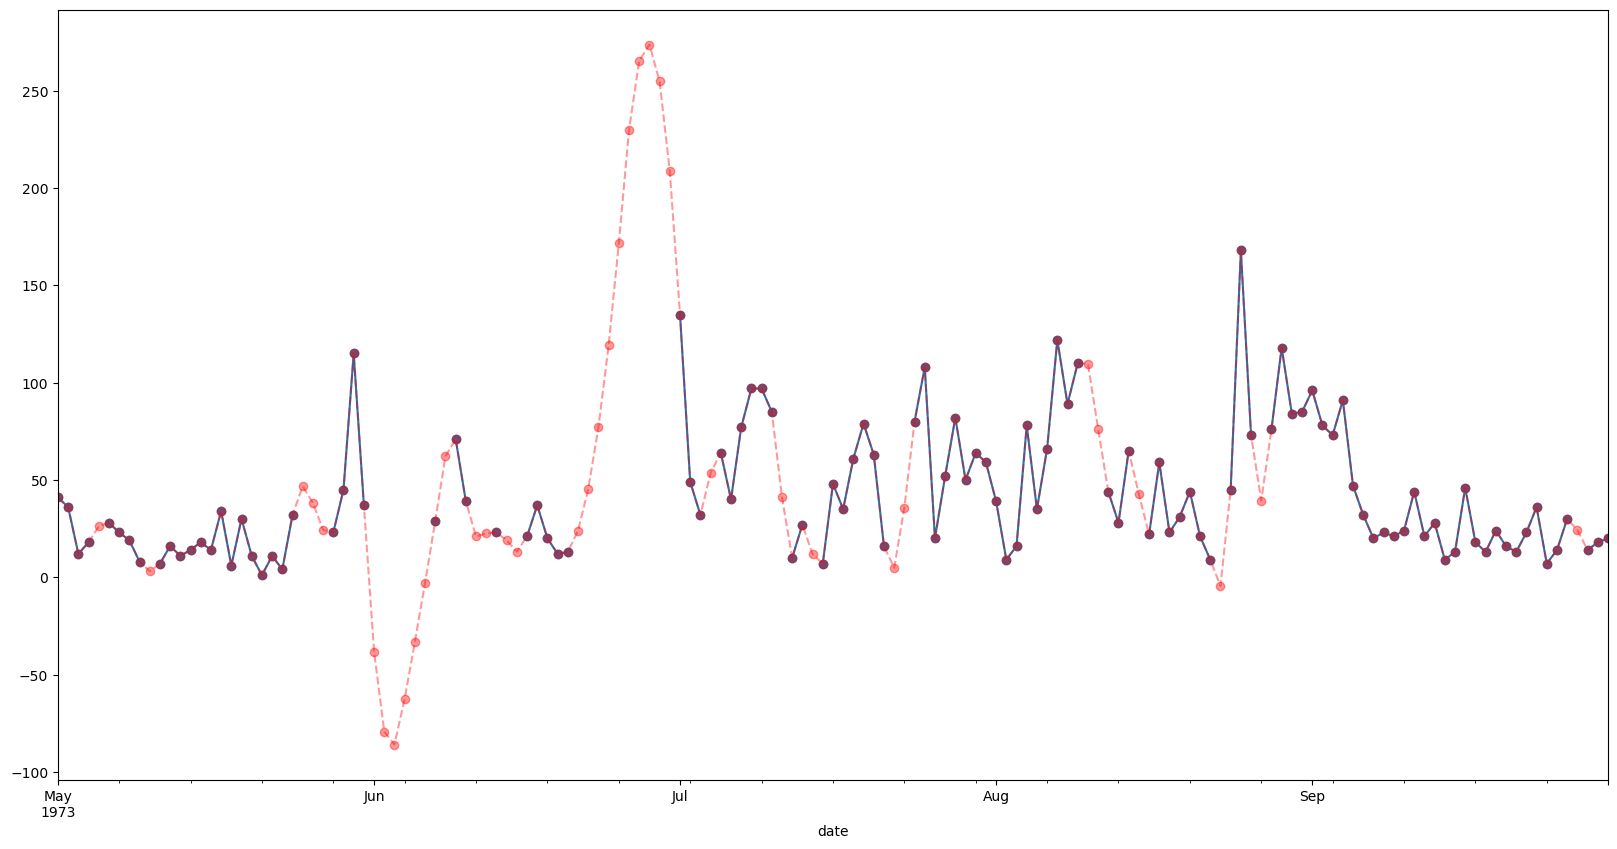

In [14]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'quadratic').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

### Akima

- Suaviza la línea hasta el próximo dato no nulo

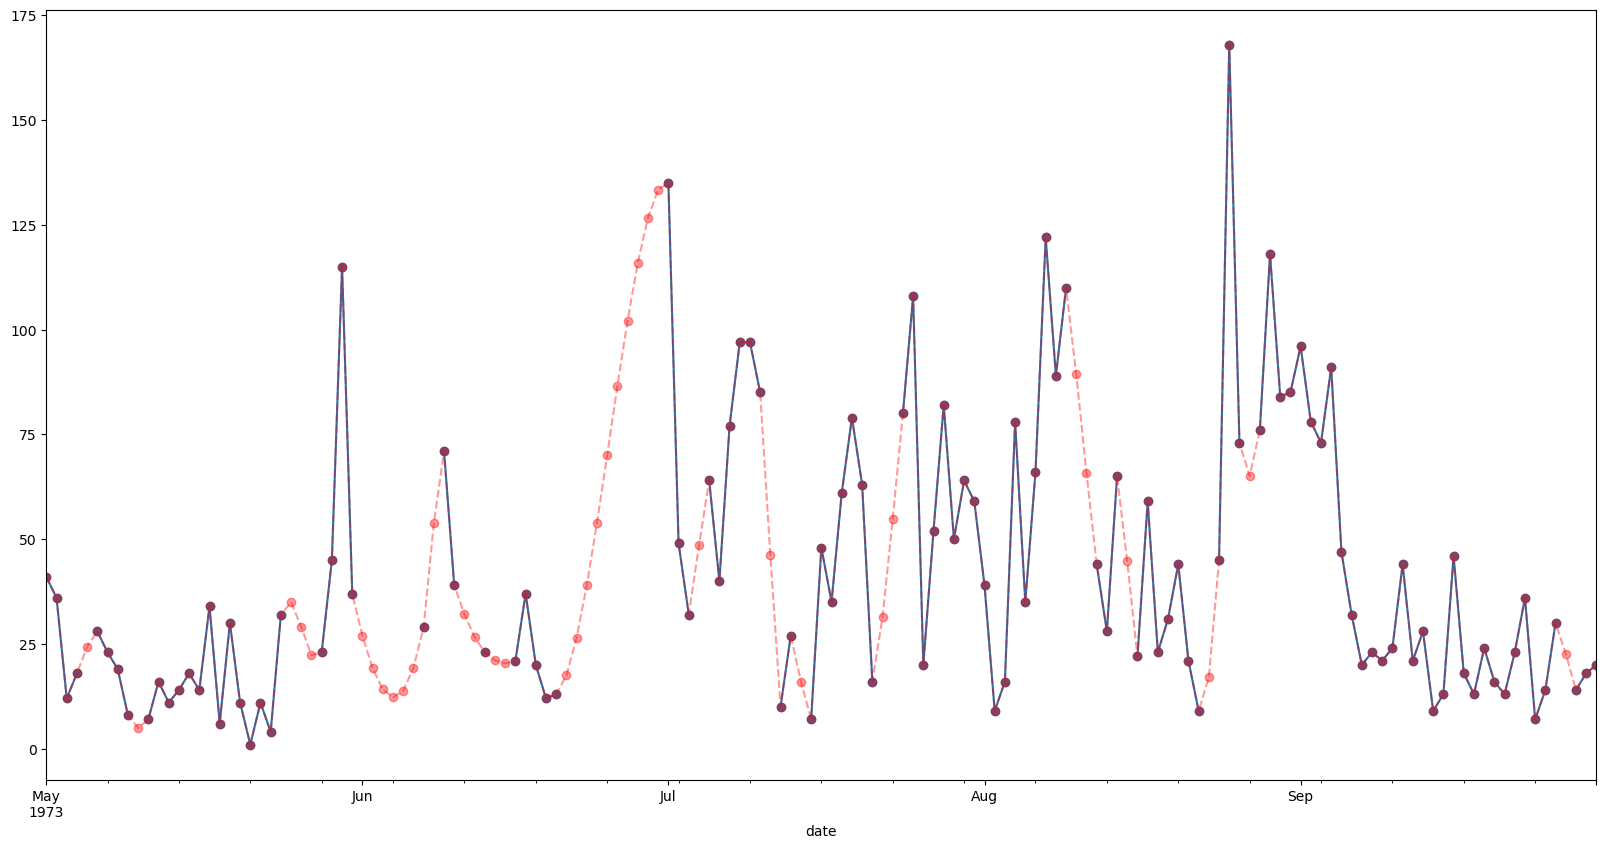

In [15]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'akima').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

### Pchip

- Suaviza la linea hasta el próximo dato no nulo, hace una suavización más agresiva q en akima, pero pchip castiga las tendencias negativas

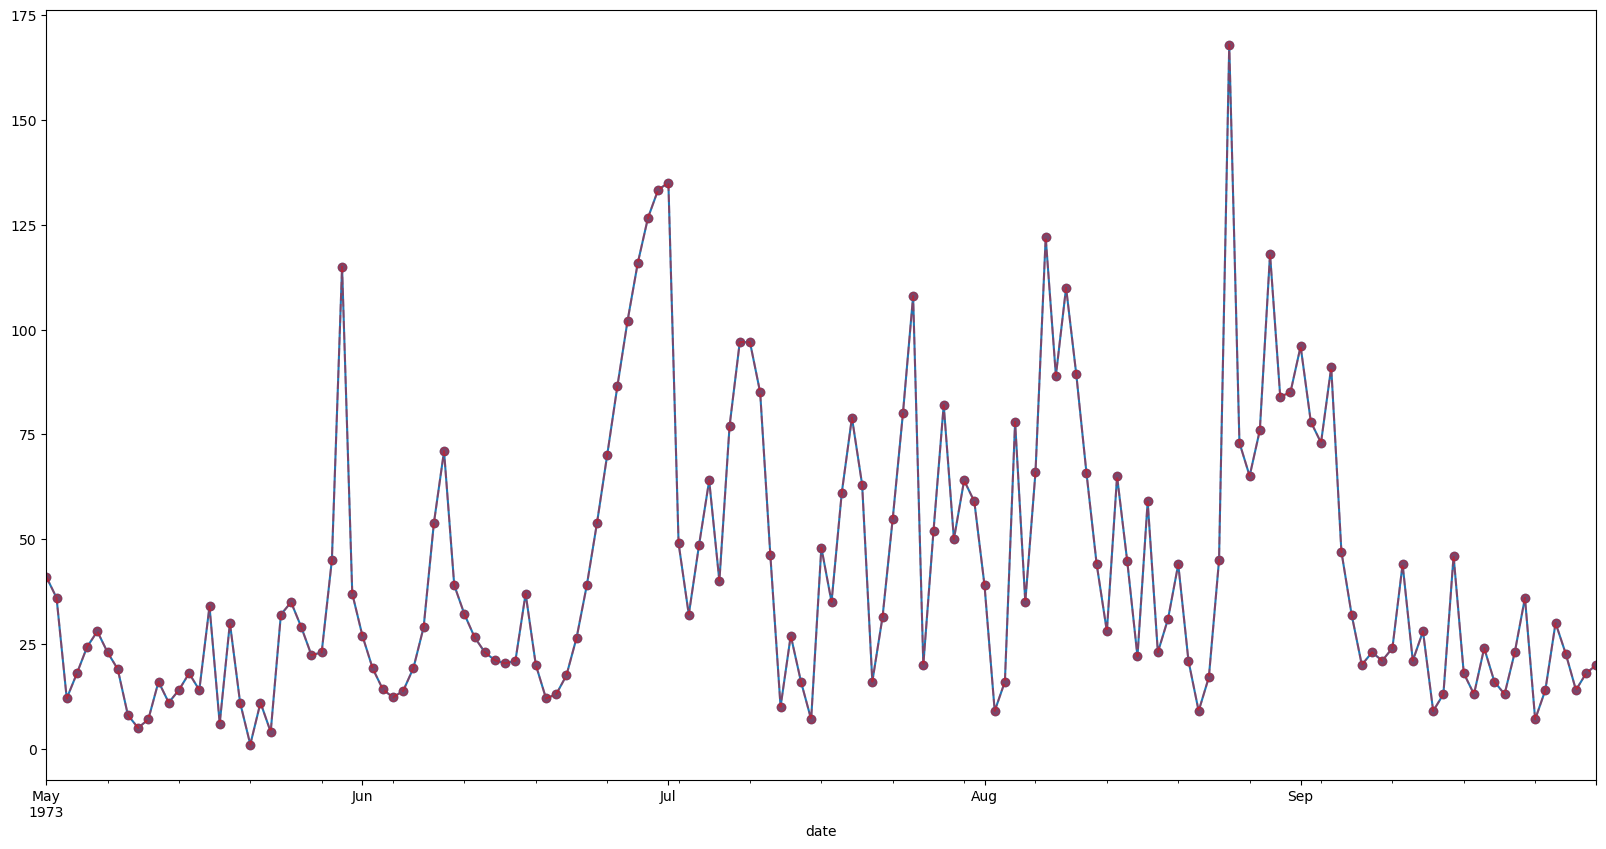

In [18]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'pchip').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

## Selección de método

In [17]:
airquality_df["ozone"] = airquality_df["ozone"].interpolate(method = 'akima')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  146 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


# Solar_r

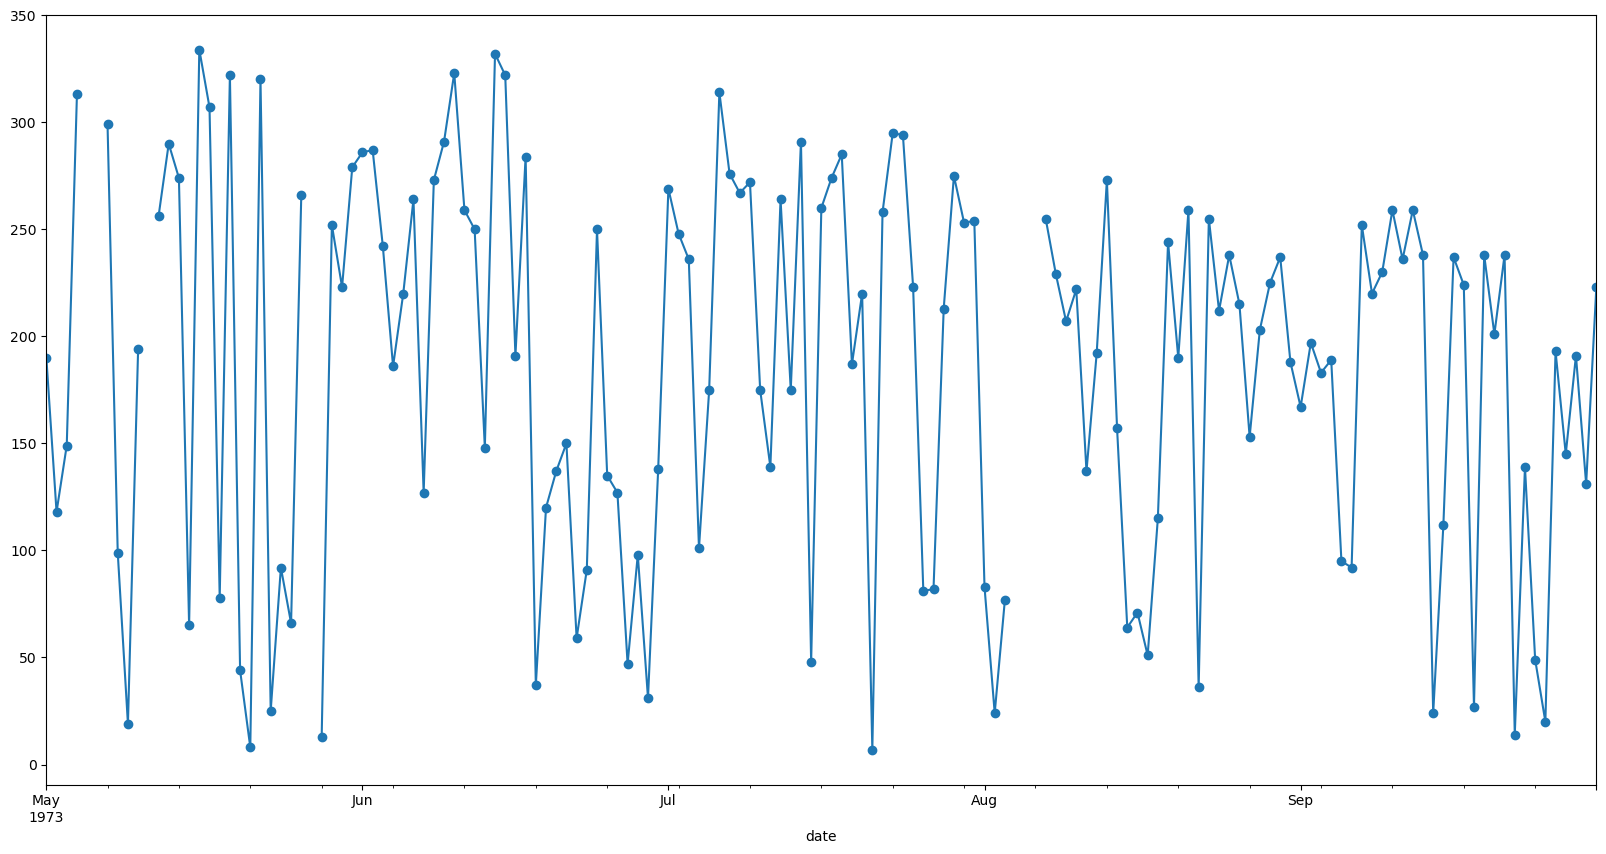

In [21]:
plt.figure(figsize=(20, 10))
airquality_df["solar_r"].plot(marker = 'o')
plt.show()

## Análisis de todos los métodos

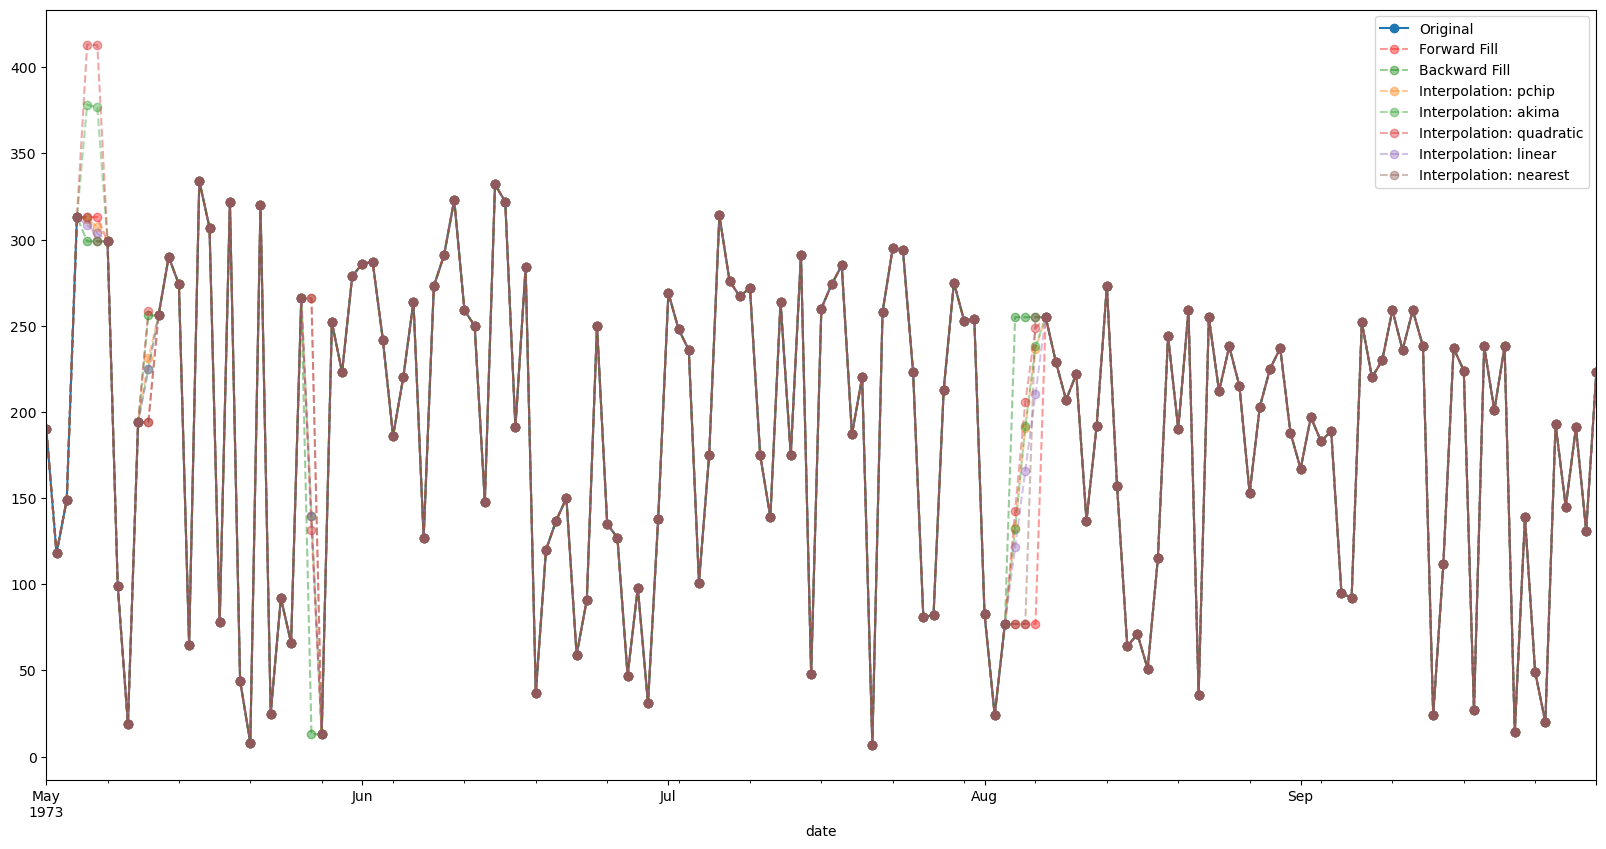

In [22]:
plt.figure(figsize=(20, 10))
airquality_df["solar_r"].plot(marker = 'o', label = 'Original')
airquality_df["solar_r"].ffill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o', label = 'Forward Fill')
airquality_df["solar_r"].bfill().plot(color = 'g', alpha = 0.4, ls = 'dashed', marker='o', label = 'Backward Fill')

methods=['pchip','akima','quadratic','linear','nearest']
    
for method in methods:
    airquality_df["solar_r"].interpolate(method = method).plot(alpha= 0.4, ls = 'dashed', marker='o', label = f'Interpolation: {method}')

plt.legend()
plt.show()

## Selección de método

In [23]:
airquality_df["solar_r"] = airquality_df["solar_r"].interpolate(method = 'pchip')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  153 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


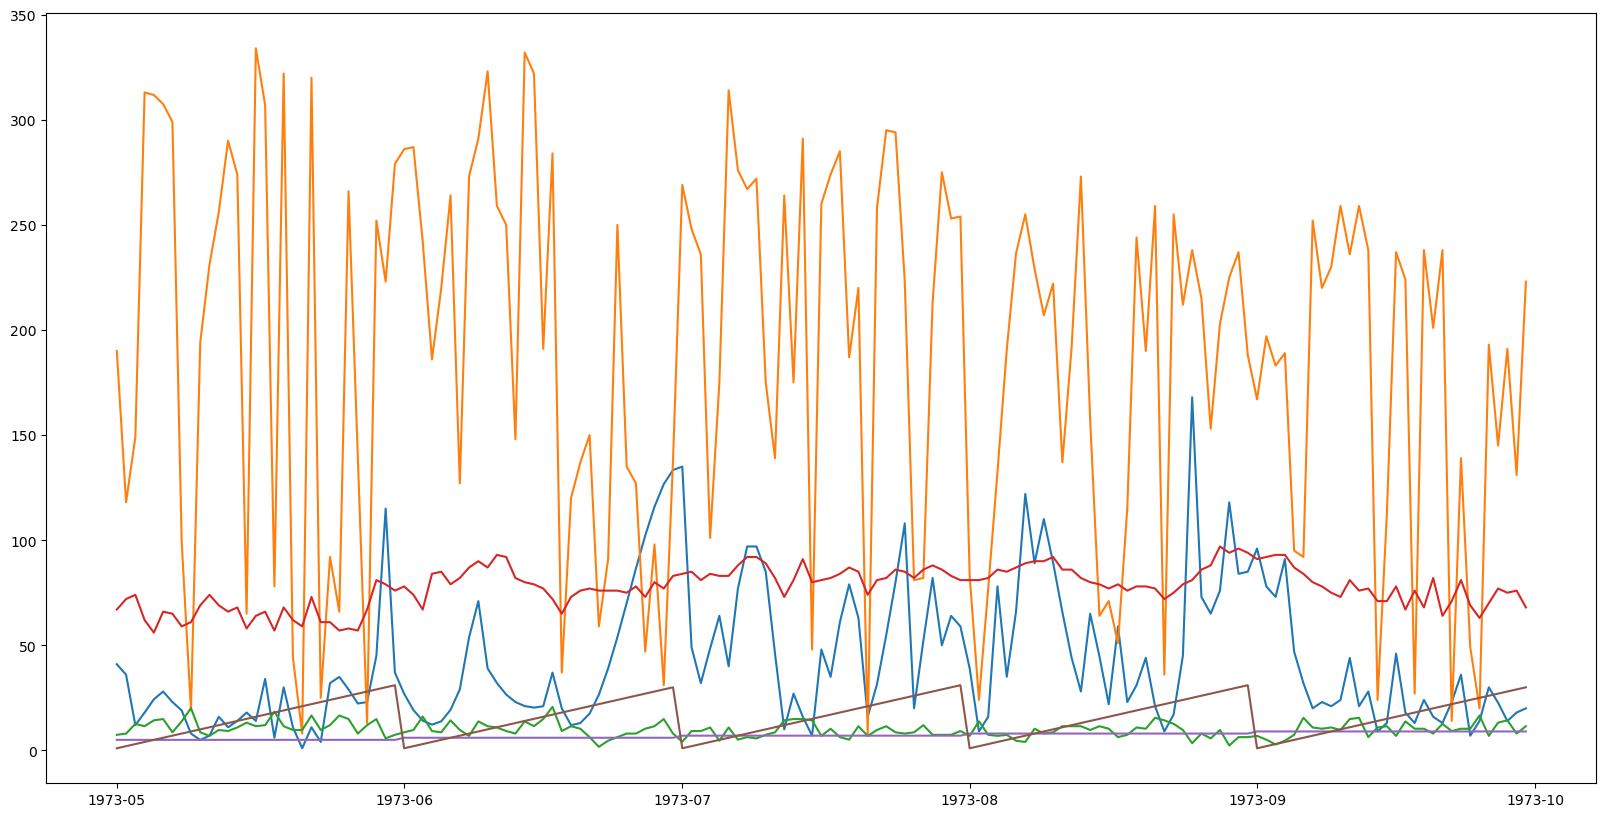

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(airquality_df.drop('year', axis=1))
plt.show()